Part 0:

In [62]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
from scipy.stats import poisson
import matplotlib.patches as mpatches
from functools import partial
import pickle
import os
import demixing as dm
from demixing import MLP, HiddenLayer

nneuron = 61
min_angle = -90
max_angle = 90
sprefs = np.linspace(min_angle, max_angle, nneuron)
eps = np.finfo(np.float64).eps
sigtc_sq = float(10**2)

In [63]:
posts = {}
testsets = {}
for s_i in range(91):
    file_name = 'output_post/post_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        posts[c, delta_s] = p
        testsets[c, delta_s] = r
for s_i in range(61):
    file_name = 'output_post_1/post_1_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        if c == [[1], [4]]:
            i = 14
        elif c == [[4], [1]]:
            i = 41
        posts[i, delta_s] = p
        testsets[i, delta_s] = r

In [64]:
post_func = dm.posterior_setup(low=1, high=1, discrete_c=1, num_s=60, r_max=1)
test_data = dm.generate_testset(4500, stim_0=-30, stim_1=-30, discrete_c=1, low=1, high=1, r_max=1)
r, _, _ = test_data
posts[1, 0] = dm.get_posteriors_pool(r, post_func)

4500 trials per contrast level


In [65]:
s1 = -30
num_deltas = 30
c_arr = [1, 2, 4, 14, 41]

post_stats = {'mean_s1': np.zeros((len(c_arr), num_deltas)), 
                'mean_s2': np.zeros((len(c_arr), num_deltas)), 
                'bias_s1': np.zeros((len(c_arr), num_deltas)), 
                'bias_s2': np.zeros((len(c_arr), num_deltas)), 
                'var_s1': np.zeros((len(c_arr), num_deltas)), 
                'var_s2': np.zeros((len(c_arr), num_deltas)), 
                'cov': np.zeros((len(c_arr), num_deltas)), 
                'corr': np.zeros((len(c_arr), num_deltas)),
                'mse': np.zeros((len(c_arr), num_deltas)),
                }
for i in range(len(c_arr)):
    c = c_arr[i]
    for delta_s in range(num_deltas): 
        if (c, delta_s) in posts:
            post_means = np.array((posts[c, delta_s]['mean_s1'], posts[c, delta_s]['mean_s2']))
            stats = dm.get_statistics(s1, s1 + delta_s, post_means)
            post_stats['mean_s1'][i][delta_s] = stats['mean_s1']
            post_stats['mean_s2'][i][delta_s] = stats['mean_s2']
            post_stats['bias_s1'][i][delta_s] = stats['bias_s1']
            post_stats['bias_s2'][i][delta_s] = stats['bias_s2']
            post_stats['var_s1'][i][delta_s] = stats['var_s1']
            post_stats['var_s2'][i][delta_s] = stats['var_s2']
            post_stats['cov'][i][delta_s] = stats['cov']
            post_stats['corr'][i][delta_s] = stats['corr']
            post_stats['mse'][i][delta_s] = stats['mse']
        else:
            print c, delta_s

In [66]:
num_deltas = 30
nn_stats = {'mean_s1': [[], [], [], [], []], 
                'mean_s2': [[], [], [], [], []], 
                'bias_s1': [[], [], [], [], []], 
                'bias_s2': [[], [], [], [], []], 
                'var_s1': [[], [], [], [], []], 
                'var_s2': [[], [], [], [], []], 
                'cov': [[], [], [], [], []], 
                'corr': [[], [], [], [], []],
                'mse': [[], [], [], [], []],
                }

for i in range(600):
    file_name = 'output_nn_runs/nn_runs' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        ind = c - 1
        if c == 4:
            ind = 2
        nn_stats['mean_s1'][ind].append(stats['mean_s1'])
        nn_stats['mean_s2'][ind].append(stats['mean_s2'])
        nn_stats['bias_s1'][ind].append(stats['bias_s1'])
        nn_stats['bias_s2'][ind].append(stats['bias_s2'])
        nn_stats['var_s1'][ind].append(stats['var_s1'])
        nn_stats['var_s2'][ind].append(stats['var_s2'])
        nn_stats['cov'][ind].append(stats['cov'])
        nn_stats['corr'][ind].append(stats['corr'])
        nn_stats['mse'][ind].append(stats['mse'])
for i in range(400):
    file_name = 'output_nn_runs_1/nn_runs_1_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        if c == [[1], [4]]:
            ind = 3
        if c == [[4], [1]]:
            ind = 4
        nn_stats['mean_s1'][ind].append(stats['mean_s1'])
        nn_stats['mean_s2'][ind].append(stats['mean_s2'])
        nn_stats['bias_s1'][ind].append(stats['bias_s1'])
        nn_stats['bias_s2'][ind].append(stats['bias_s2'])
        nn_stats['var_s1'][ind].append(stats['var_s1'])
        nn_stats['var_s2'][ind].append(stats['var_s2'])
        nn_stats['cov'][ind].append(stats['cov'])
        nn_stats['corr'][ind].append(stats['corr'])
        nn_stats['mse'][ind].append(stats['mse'])
for ind in range(len(nn_stats['mean_s1'])):
    nn_stats['mean_s1'][ind] = np.array(nn_stats['mean_s1'][ind])
    nn_stats['mean_s2'][ind] = np.array(nn_stats['mean_s2'][ind])
    nn_stats['bias_s1'][ind] = np.array(nn_stats['bias_s1'][ind])
    nn_stats['bias_s2'][ind] = np.array(nn_stats['bias_s2'][ind])
    nn_stats['var_s1'][ind] = np.array(nn_stats['var_s1'][ind])
    nn_stats['var_s2'][ind] = np.array(nn_stats['var_s2'][ind])
    nn_stats['cov'][ind] = np.array(nn_stats['cov'][ind])
    nn_stats['corr'][ind] = np.array(nn_stats['corr'][ind])
    nn_stats['mse'][ind] = np.array(nn_stats['mse'][ind])

In [68]:
pkl_file = open('stats_part0.pkl', 'wb')
pickle.dump((post_stats, nn_stats), pkl_file)
pkl_file.close()

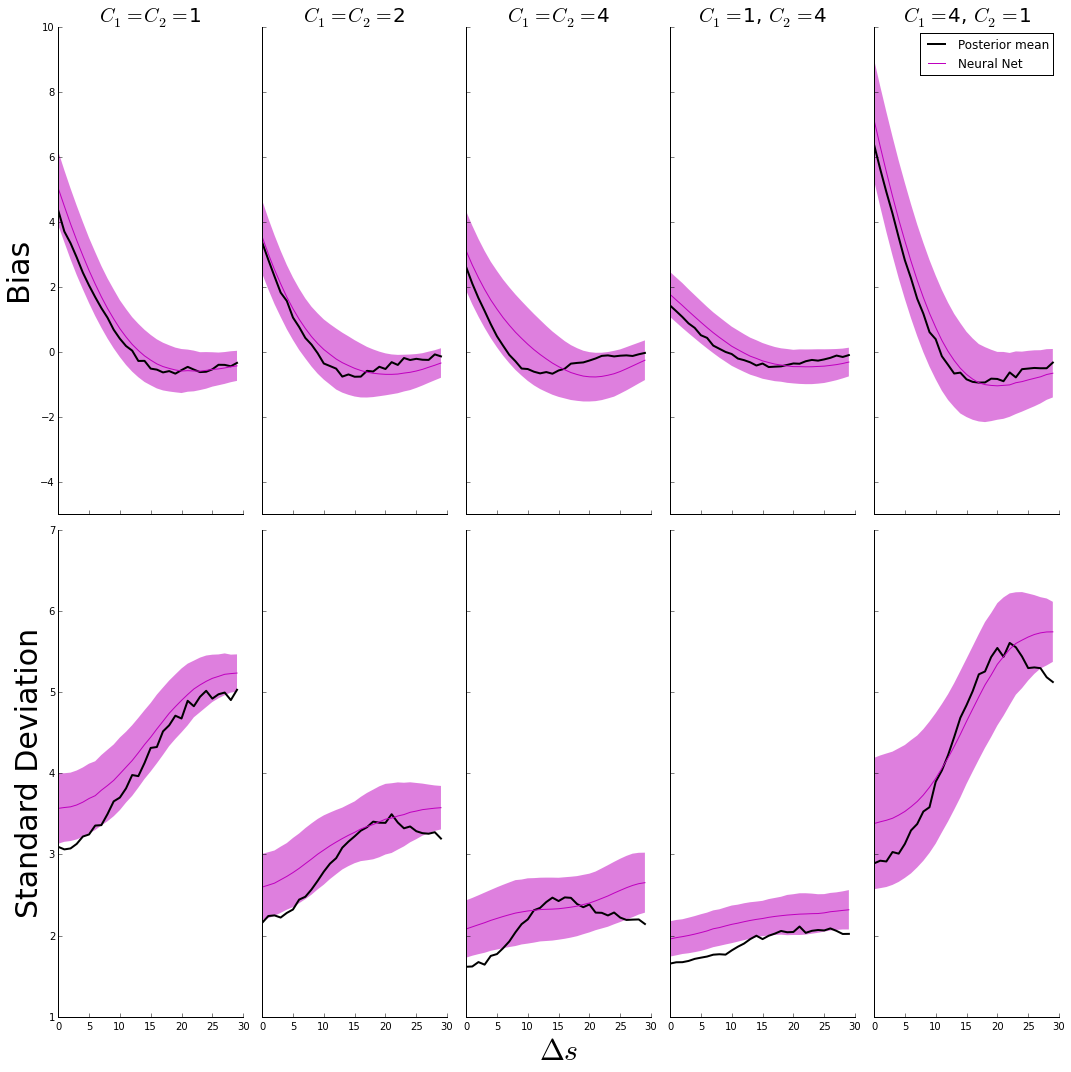

In [71]:
%matplotlib inline
c_arr = [1, 2, 4, [1, 4], [4, 1]]
f, ax = plt.subplots(2, len(c_arr), sharex='col', sharey='row')
s = range(0, 30)
for i in range(len(c_arr)):
    neg_sd = np.mean(nn_stats['bias_s2'][i], axis=0) - np.std(nn_stats['bias_s2'][i], axis=0)
    pos_sd = np.mean(nn_stats['bias_s2'][i], axis=0) + np.std(nn_stats['bias_s2'][i], axis=0)
    ax[0, i].plot(post_stats['bias_s2'][i], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(np.mean(nn_stats['bias_s2'][i], axis=0), c='m', label="Neural Net")
    if type(c_arr[i]) is int:
        ax[0, i].set_title(r'$C_1 = C_2 = $' + str(c_arr[i]), fontsize=20) #Change
    if type(c_arr[i]) is list:
        ax[0, i].set_title(r'$C_1 = $' + str(c_arr[i][0]) + ", " + r'$C_2 = $' + str(c_arr[i][1]), fontsize=20)
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].set_ylim(-5, 10)
    ax[0, i].spines["top"].set_visible(False)
    ax[0, i].spines["right"].set_visible(False)
    ax[0, i].yaxis.set_ticks_position('left')
    ax[0, i].xaxis.set_ticks_position('bottom')
ax[0, 0].set_ylabel('Bias' ,fontsize=30)
ax[0, len(c_arr)-1].legend(loc='upper right')
for i in range(len(c_arr)):
    nn_sd = np.sqrt(nn_stats['var_s2'][i])
    post_sd = np.sqrt(post_stats['var_s2'][i])
    neg_sd = np.mean(nn_sd, axis=0) - np.std(nn_sd, axis=0)
    pos_sd = np.mean(nn_sd, axis=0) + np.std(nn_sd, axis=0)
    ax[1, i].plot(post_sd, c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(np.mean(nn_sd, axis=0), c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[1, i].spines["top"].set_visible(False)
    ax[1, i].spines["right"].set_visible(False)
    ax[1, i].yaxis.set_ticks_position('left')
    ax[1, i].xaxis.set_ticks_position('bottom')
ax[1, (len(c_arr)/2)].set_xlabel(r'$\Delta s$',fontsize=30)
ax[1, 0].set_ylabel('Standard Deviation' ,fontsize=30)
f.set_size_inches(15,15)
plt.tight_layout()

Part 1:

In [72]:
posts = {}
testsets = {}
for s_i in range(31):
    file_name = 'output_post_2/post_2_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        posts[delta_s] = p
        testsets[delta_s] = r

In [126]:
s1 = -30
num_deltas = 30
c_arr = [[1, 2, 4], [1, 2, 4]]
perm_cs = dm.cartesian(c_arr)
ndata_per_c = len(posts[0]['mean_s1'])/len(perm_cs)

post_stats = {'mean_s1': np.zeros((num_deltas, len(perm_cs))), 
                'mean_s2': np.zeros((num_deltas, len(perm_cs))),  
                'bias_s1': np.zeros((num_deltas, len(perm_cs))),  
                'bias_s2': np.zeros((num_deltas, len(perm_cs))),  
                'var_s1': np.zeros((num_deltas, len(perm_cs))),   
                'var_s2': np.zeros((num_deltas, len(perm_cs))),  
                'cov': np.zeros((num_deltas, len(perm_cs))),   
                'corr': np.zeros((num_deltas, len(perm_cs))),  
                'mse': np.zeros((num_deltas, len(perm_cs))),  
                }

for delta_s in range(num_deltas): 
    if delta_s in posts:
        post_means = np.array((posts[delta_s]['mean_s1'], posts[delta_s]['mean_s2']))
        for c in range(len(perm_cs)):
            post_means_c = post_means[:, (c*ndata_per_c):((c+1)*ndata_per_c)]
            stats = dm.get_statistics(s1, s1 + delta_s, post_means_c)
            post_stats['mean_s1'][delta_s][c] = stats['mean_s1']
            post_stats['mean_s2'][delta_s][c] = stats['mean_s2']
            post_stats['bias_s1'][delta_s][c] = stats['bias_s1']
            post_stats['bias_s2'][delta_s][c] = stats['bias_s2']
            post_stats['var_s1'][delta_s][c] = stats['var_s1']
            post_stats['var_s2'][delta_s][c] = stats['var_s2']
            post_stats['cov'][delta_s][c] = stats['cov']
            post_stats['corr'][delta_s][c] = stats['corr']
            post_stats['mse'][delta_s][c] = stats['mse']
    else:
        print delta_s

In [74]:
num_deltas = 30
nn_stats = {'mean_s1': [[], []], 
                'mean_s2': [[], []], 
                'bias_s1': [[], []], 
                'bias_s2': [[], []], 
                'var_s1': [[], []], 
                'var_s2': [[], []], 
                'cov': [[], []], 
                'corr': [[], []],
                'mse': [[], []],
                }

for i in range(400):
    file_name = 'output_nn_runs_2/nn_runs_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nn_stats['mean_s1'][0].append(stats['mean_s1'])
        nn_stats['mean_s2'][0].append(stats['mean_s2'])
        nn_stats['bias_s1'][0].append(stats['bias_s1'])
        nn_stats['bias_s2'][0].append(stats['bias_s2'])
        nn_stats['var_s1'][0].append(stats['var_s1'])
        nn_stats['var_s2'][0].append(stats['var_s2'])
        nn_stats['cov'][0].append(stats['cov'])
        nn_stats['corr'][0].append(stats['corr'])
        nn_stats['mse'][0].append(stats['mse'])
for i in range(400):
    file_name = 'output_nn_runs_3/nn_runs_3_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nn_stats['mean_s1'][1].append(stats['mean_s1'])
        nn_stats['mean_s2'][1].append(stats['mean_s2'])
        nn_stats['bias_s1'][1].append(stats['bias_s1'])
        nn_stats['bias_s2'][1].append(stats['bias_s2'])
        nn_stats['var_s1'][1].append(stats['var_s1'])
        nn_stats['var_s2'][1].append(stats['var_s2'])
        nn_stats['cov'][1].append(stats['cov'])
        nn_stats['corr'][1].append(stats['corr'])
        nn_stats['mse'][1].append(stats['mse'])
for ind in range(len(nn_stats['mean_s1'])):
    nn_stats['mean_s1'][ind] = np.array(nn_stats['mean_s1'][ind])
    nn_stats['mean_s2'][ind] = np.array(nn_stats['mean_s2'][ind])
    nn_stats['bias_s1'][ind] = np.array(nn_stats['bias_s1'][ind])
    nn_stats['bias_s2'][ind] = np.array(nn_stats['bias_s2'][ind])
    nn_stats['var_s1'][ind] = np.array(nn_stats['var_s1'][ind])
    nn_stats['var_s2'][ind] = np.array(nn_stats['var_s2'][ind])
    nn_stats['cov'][ind] = np.array(nn_stats['cov'][ind])
    nn_stats['corr'][ind] = np.array(nn_stats['corr'][ind])
    nn_stats['mse'][ind] = np.array(nn_stats['mse'][ind])

In [128]:
num_deltas = 30
nn_stats = {'mean_s1': [[], []], 
                'mean_s2': [[], []], 
                'bias_s1': [[], []], 
                'bias_s2': [[], []], 
                'var_s1': [[], []], 
                'var_s2': [[], []], 
                'cov': [[], []], 
                'corr': [[], []],
                'mse': [[], []],
                }

for i in range(400):
    file_name = 'output_nn_tests_2/nn_tests_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nn_stats['mean_s1'][0].append(stats['mean_s1'])
        nn_stats['mean_s2'][0].append(stats['mean_s2'])
        nn_stats['bias_s1'][0].append(stats['bias_s1'])
        nn_stats['bias_s2'][0].append(stats['bias_s2'])
        nn_stats['var_s1'][0].append(stats['var_s1'])
        nn_stats['var_s2'][0].append(stats['var_s2'])
        nn_stats['cov'][0].append(stats['cov'])
        nn_stats['corr'][0].append(stats['corr'])
        nn_stats['mse'][0].append(stats['mse'])
for i in range(400):
    file_name = 'output_nn_tests_3/nn_tests_3_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nn_stats['mean_s1'][1].append(stats['mean_s1'])
        nn_stats['mean_s2'][1].append(stats['mean_s2'])
        nn_stats['bias_s1'][1].append(stats['bias_s1'])
        nn_stats['bias_s2'][1].append(stats['bias_s2'])
        nn_stats['var_s1'][1].append(stats['var_s1'])
        nn_stats['var_s2'][1].append(stats['var_s2'])
        nn_stats['cov'][1].append(stats['cov'])
        nn_stats['corr'][1].append(stats['corr'])
        nn_stats['mse'][1].append(stats['mse'])
for ind in range(len(nn_stats['mean_s1'])):
    nn_stats['mean_s1'][ind] = np.array(nn_stats['mean_s1'][ind])
    nn_stats['mean_s2'][ind] = np.array(nn_stats['mean_s2'][ind])
    nn_stats['bias_s1'][ind] = np.array(nn_stats['bias_s1'][ind])
    nn_stats['bias_s2'][ind] = np.array(nn_stats['bias_s2'][ind])
    nn_stats['var_s1'][ind] = np.array(nn_stats['var_s1'][ind])
    nn_stats['var_s2'][ind] = np.array(nn_stats['var_s2'][ind])
    nn_stats['cov'][ind] = np.array(nn_stats['cov'][ind])
    nn_stats['corr'][ind] = np.array(nn_stats['corr'][ind])
    nn_stats['mse'][ind] = np.array(nn_stats['mse'][ind])

In [143]:
print perm_cs[0], perm_cs[4], perm_cs[8], perm_cs[2], perm_cs[6]

[1 1] [2 2] [4 4] [1 4] [4 1]


In [140]:
print post_stats['bias_s1'][0]
print np.mean(nn_stats['bias_s1'][0][0], axis=0)

[-1.40819301  0.1965011   2.72286765 -3.43109454 -1.92415552  0.26600669
 -4.42555936 -2.66702395 -0.415126  ]


In [144]:
pkl_file = open('stats_part1.pkl', 'wb')
pickle.dump((post_stats, nn_stats), pkl_file)
pkl_file.close()

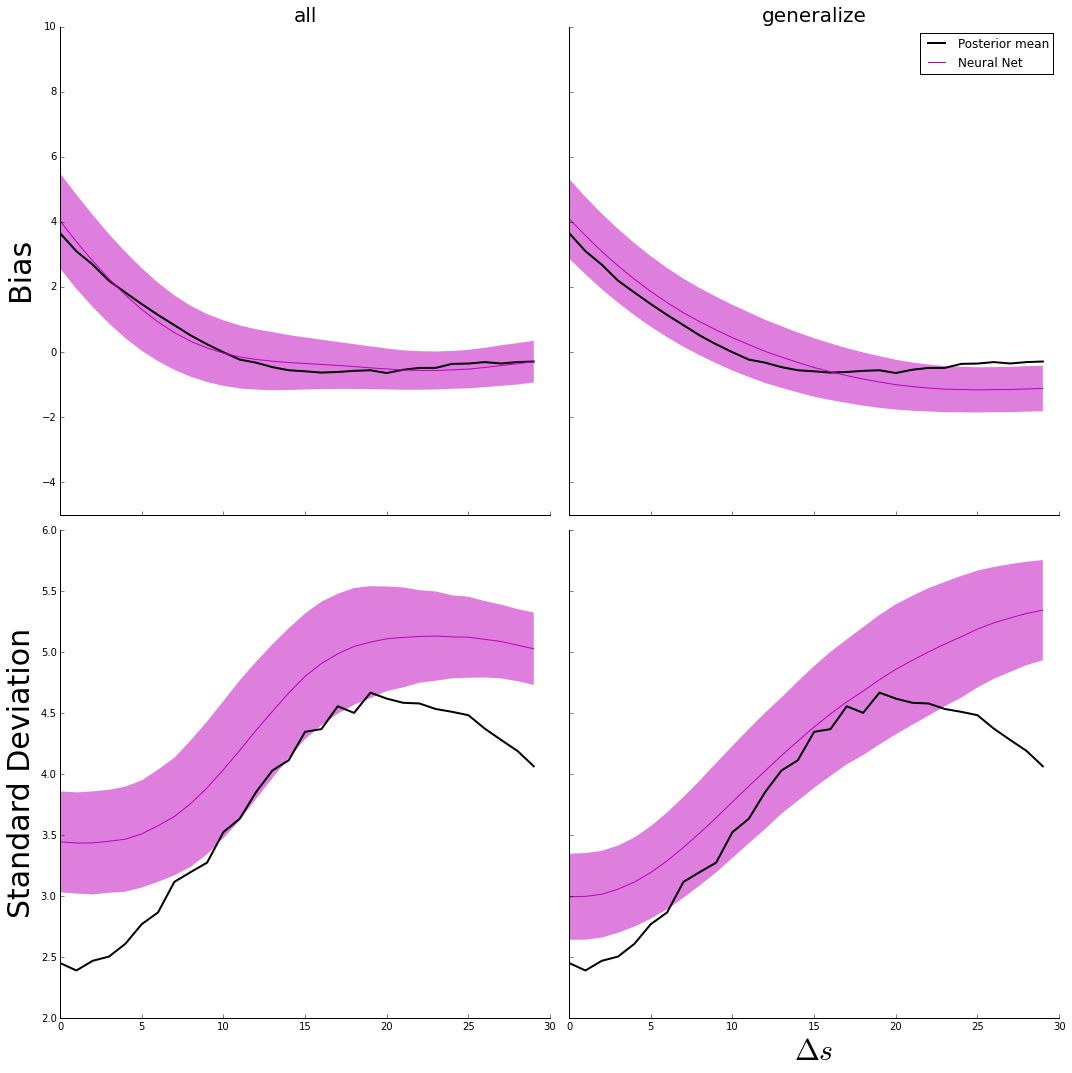

In [75]:
train_arr = ["all", "generalize"]
f, ax = plt.subplots(2, len(train_arr), sharex='col', sharey='row')
s = range(0, 30)
for i in range(len(train_arr)):
    neg_sd = np.mean(nn_stats['bias_s2'][i], axis=0) - np.std(nn_stats['bias_s2'][i], axis=0)
    pos_sd = np.mean(nn_stats['bias_s2'][i], axis=0) + np.std(nn_stats['bias_s2'][i], axis=0)
    ax[0, i].plot(post_stats['bias_s2'], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(np.mean(nn_stats['bias_s2'][i], axis=0), c='m', label="Neural Net")
    if type(train_arr[i]) is int:
        ax[0, i].set_title(r'$C_1 = C_2 = $' + str(c_arr[i]), fontsize=20) #Change
    if type(train_arr[i]) is list:
        ax[0, i].set_title(r'$C_1 = $' + str(c_arr[i][0]) + ", " + r'$C_2 = $' + str(c_arr[i][1]), fontsize=20)
    if type(train_arr[i]) is str:
        ax[0, i].set_title(train_arr[i], fontsize=20)
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].set_ylim(-5, 10)
    ax[0, i].spines["top"].set_visible(False)
    ax[0, i].spines["right"].set_visible(False)
    ax[0, i].yaxis.set_ticks_position('left')
    ax[0, i].xaxis.set_ticks_position('bottom')
ax[0, 0].set_ylabel('Bias' ,fontsize=30)
ax[0, len(train_arr)-1].legend(loc='upper right')
for i in range(len(train_arr)):
    nn_sd = np.sqrt(nn_stats['var_s2'][i])
    post_sd = np.sqrt(post_stats['var_s2'])
    neg_sd = np.mean(nn_sd, axis=0) - np.std(nn_sd, axis=0)
    pos_sd = np.mean(nn_sd, axis=0) + np.std(nn_sd, axis=0)
    ax[1, i].plot(post_sd, c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(np.mean(nn_sd, axis=0), c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[1, i].spines["top"].set_visible(False)
    ax[1, i].spines["right"].set_visible(False)
    ax[1, i].yaxis.set_ticks_position('left')
    ax[1, i].xaxis.set_ticks_position('bottom')
ax[1, (len(train_arr)/2)].set_xlabel(r'$\Delta s$',fontsize=30)
ax[1, 0].set_ylabel('Standard Deviation' ,fontsize=30)
f.set_size_inches(15,15)
plt.tight_layout()

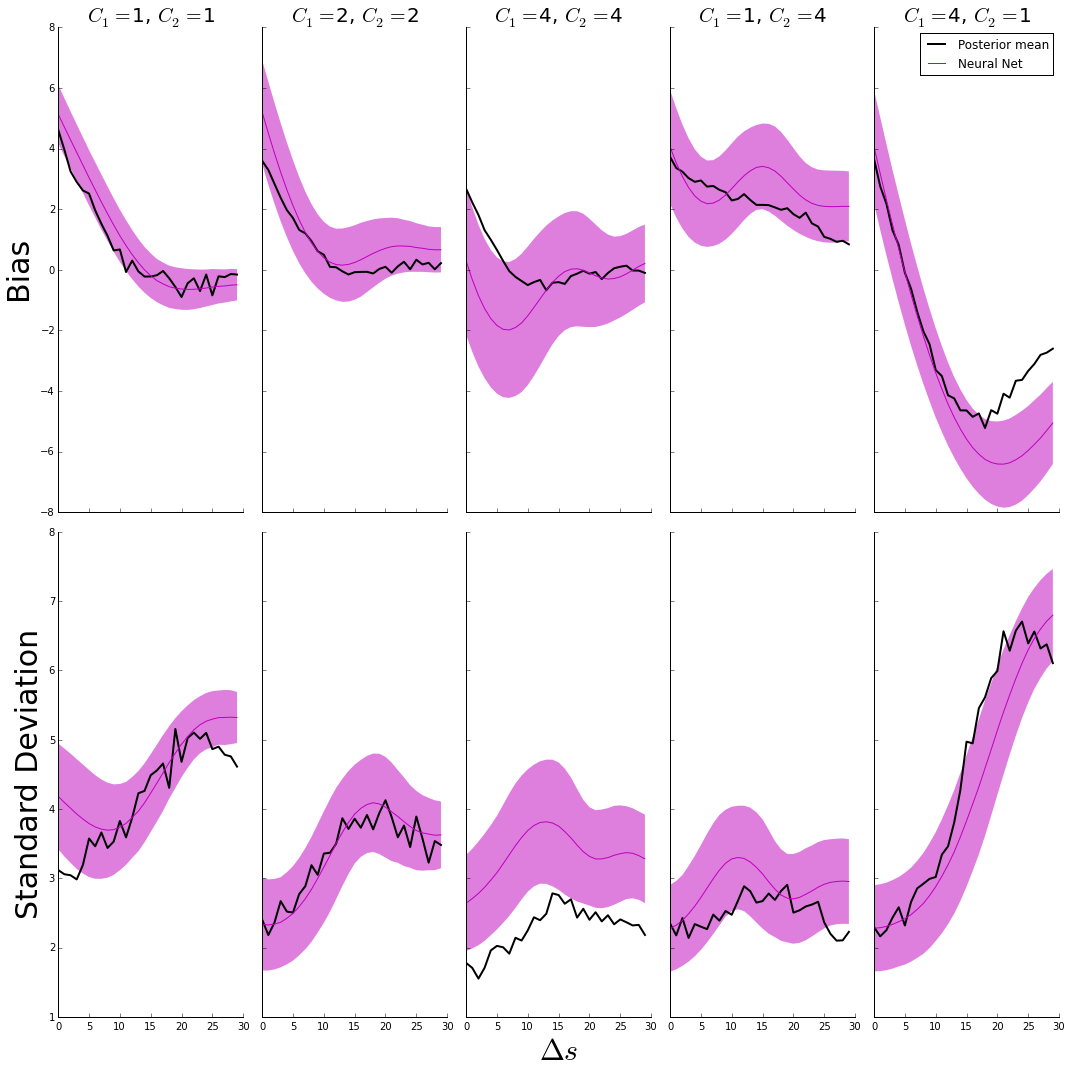

In [201]:
c_arr_inds = [0, 4, 8, 2, 6]
train_arr = ["all", "generalize"]
ind = 0
f, ax = plt.subplots(2, len(c_arr_inds), sharex='col', sharey='row')
s = range(0, 30)
for i in range(len(c_arr_inds)):
    nn_mean = np.mean(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[0, i].plot(post_stats['bias_s2'][:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(nn_mean, c='m', label="Neural Net")
    ax[0, i].set_title(r'$C_1 = $' + str(perm_cs[c_arr_inds[i]][0]) + ", " + r'$C_2 = $' + str(perm_cs[c_arr_inds[i]][1]), fontsize=20)
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].spines["top"].set_visible(False)
    ax[0, i].spines["right"].set_visible(False)
    ax[0, i].yaxis.set_ticks_position('left')
    ax[0, i].xaxis.set_ticks_position('bottom')
ax[0, 0].set_ylabel('Bias' ,fontsize=30)
ax[0, len(c_arr_inds)-1].legend(loc='upper right')

for i in range(len(c_arr_inds)):
    nn_sds = np.sqrt(nn_stats['var_s2'][ind])
    post_sds = np.sqrt(post_stats['var_s2'])
    nn_mean = np.mean(nn_sds, axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_sds, axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[1, i].plot(post_sds[:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(nn_mean , c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[1, i].spines["top"].set_visible(False)
    ax[1, i].spines["right"].set_visible(False)
    ax[1, i].yaxis.set_ticks_position('left')
    ax[1, i].xaxis.set_ticks_position('bottom')
ax[1, (len(c_arr_inds)/2)].set_xlabel(r'$\Delta s$',fontsize=30)
ax[1, 0].set_ylabel('Standard Deviation' ,fontsize=30)

f.set_size_inches(15,15)
plt.tight_layout()

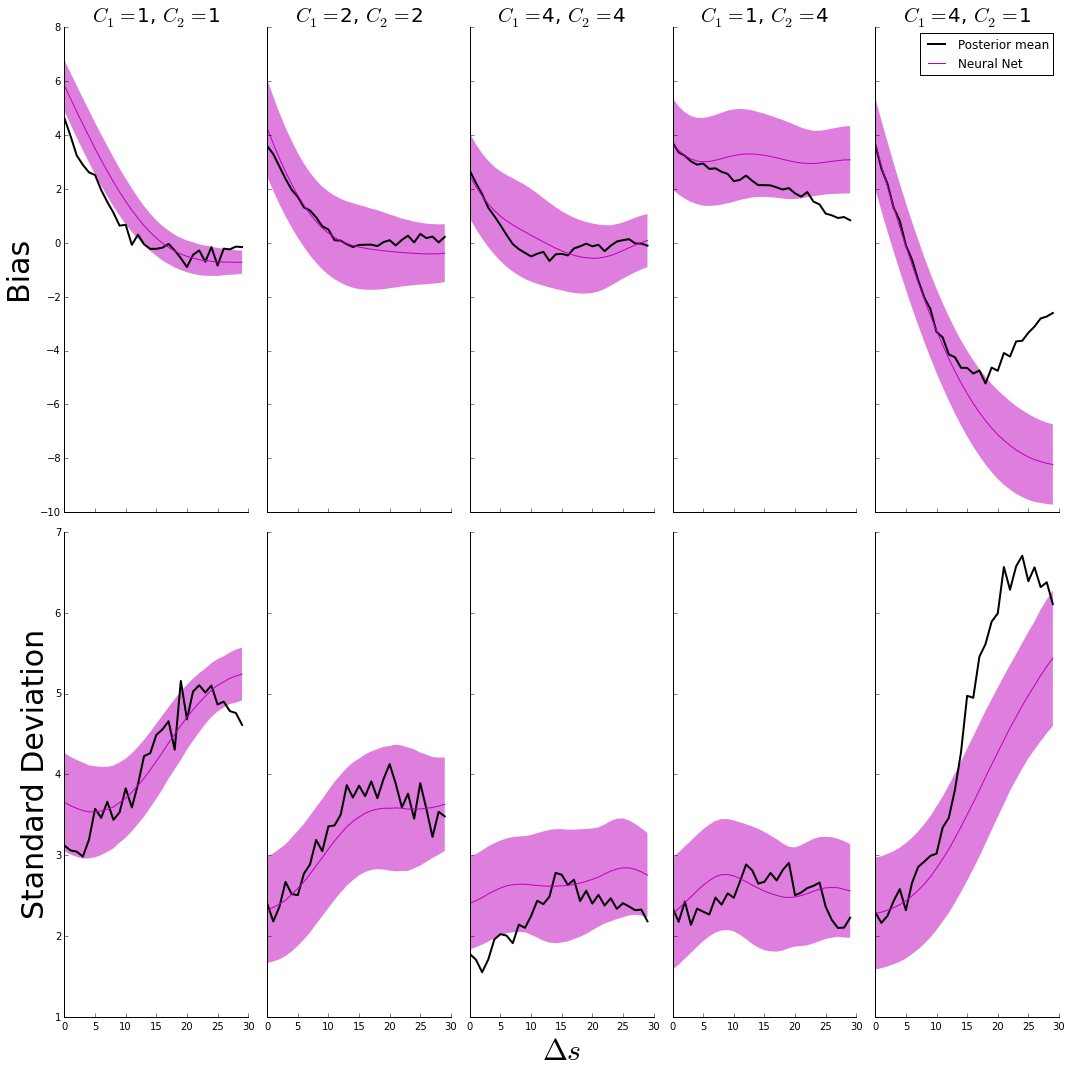

In [202]:
c_arr_inds = [0, 4, 8, 2, 6]
train_arr = ["all", "generalize"]
ind = 1
f, ax = plt.subplots(2, len(c_arr_inds), sharex='col', sharey='row')
s = range(0, 30)
for i in range(len(c_arr_inds)):
    nn_mean = np.mean(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[0, i].plot(post_stats['bias_s2'][:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(nn_mean, c='m', label="Neural Net")
    ax[0, i].set_title(r'$C_1 = $' + str(perm_cs[c_arr_inds[i]][0]) + ", " + r'$C_2 = $' + str(perm_cs[c_arr_inds[i]][1]), fontsize=20)
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].spines["top"].set_visible(False)
    ax[0, i].spines["right"].set_visible(False)
    ax[0, i].yaxis.set_ticks_position('left')
    ax[0, i].xaxis.set_ticks_position('bottom')
ax[0, 0].set_ylabel('Bias' ,fontsize=30)
ax[0, len(c_arr_inds)-1].legend(loc='upper right')

for i in range(len(c_arr_inds)):
    nn_sds = np.sqrt(nn_stats['var_s2'][ind])
    post_sds = np.sqrt(post_stats['var_s2'])
    nn_mean = np.mean(nn_sds, axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_sds, axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[1, i].plot(post_sds[:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(nn_mean , c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[1, i].spines["top"].set_visible(False)
    ax[1, i].spines["right"].set_visible(False)
    ax[1, i].yaxis.set_ticks_position('left')
    ax[1, i].xaxis.set_ticks_position('bottom')
ax[1, (len(c_arr_inds)/2)].set_xlabel(r'$\Delta s$',fontsize=30)
ax[1, 0].set_ylabel('Standard Deviation' ,fontsize=30)

f.set_size_inches(15,15)
plt.tight_layout()

Just for presentation:

In [78]:
r20, s, c = dm.generate_testset(1, stim_0=15, stim_1=20, con_0=4, con_1=0, r_max=1)
rm20, s, c = dm.generate_testset(1, stim_0=15, stim_1=20, con_0=0, con_1=4, r_max=1)

(-0.3, 11)

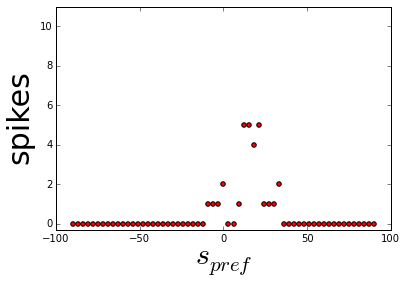

In [79]:
%matplotlib inline
plt.scatter(np.linspace(min_angle, max_angle, nneuron), r20[0], c='r')
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])

(-0.3, 11)

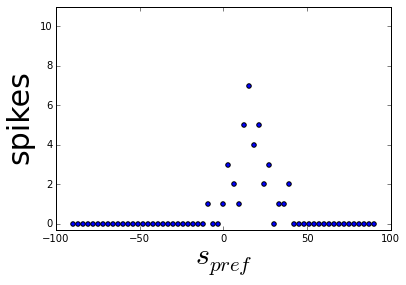

In [80]:
plt.scatter(np.linspace(min_angle, max_angle, nneuron), rm20[0])
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])

"\nplt.arrow(-20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')\nplt.arrow(20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')\nplt.arrow(-19.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')\nplt.arrow(22.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')\nplt.arrow(-21, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')\nplt.arrow(23.5, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')\n"

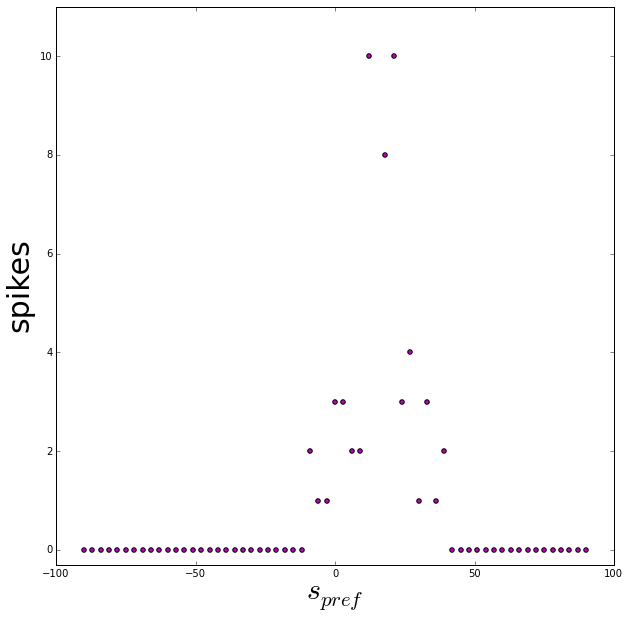

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(np.linspace(min_angle, max_angle, nneuron), rm20[0] + r20[0], c='m')
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])
"""
plt.arrow(-20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')
plt.arrow(20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')
plt.arrow(-19.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')
plt.arrow(22.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')
plt.arrow(-21, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')
plt.arrow(23.5, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')
"""

Posterior plot:

In [83]:
post_func = dm.posterior_setup(discrete_c = [[4], [4]], num_s=121, r_max=1)

In [84]:
mean1, mean2, var1, var2, (s1_grid, s2_grid, grid) = post_func(rm20[0] + r20[0], ret_grid=True)

In [85]:
post_grid = np.zeros((121, 121))
for i in range(len(s1_grid)):
    post_grid[int(s1_grid[i])+60, int(s2_grid[i])+60] = grid[i]

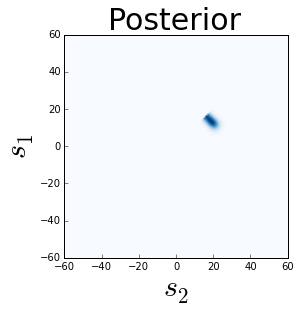

In [108]:
ax = plt.axes()
plt.imshow(post_grid, origin='lower', cmap='Blues', extent=(-60, 60, -60, 60))
plt.ylabel("$s_1$", fontsize=30)
plt.xlabel("$s_2$", fontsize=30)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.title("Posterior", fontsize=30)